### Contents:






### 1) Data Processing
### 2) Cleaning the data
### 3) Visualising & Analyze the data
### 4)  Summary


# Data Processing

#### This dataset containing the business statistics of the Ramen brands and their perfomance in the countries across the world. 

In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the Datasets
df = pd.read_csv("C:/Users/yi.lu/Downloads/ratings.csv") 
# Printing the fist 5 rows
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
# See Datasets Size
shape = df.shape
print("Rows :",shape[0])
print("Columns :",shape[1])

Rows : 2580
Columns : 7


In [5]:
## Looking at datasets Statistic basic informations
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


#### Data Extracted from info() function:

#### 1) Rows are 2580 and Columns are 7, Each review has unique key Review # fron 1 to 2580
#### 2) There are 5 categorical columns and 2 numerical columns, but the Star column store as string, convert it later.


In [6]:
#Although stars is numberic but it is stored as string in the dataframe
#Let's convert it into numeric value.
df['Stars']=pd.to_numeric(df['Stars'], errors='coerce')

In [7]:
# Get dataset descriptive statistics for numberica column
df.describe()

,Review #,Stars
count,2580.000000,2577.000000
mean,1290.500000,3.654676
std,744.926171,1.015331
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


In [8]:
# Get dataset descriptive statistics for all the columns
df.describe(include ="all")

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2577.000000,41
unique,NaN,355,2413,7,38,NaN,38
top,NaN,Nissin,Chicken,Pack,Japan,NaN,\n
freq,NaN,381,7,1531,352,NaN,4
mean,1290.500000,NaN,NaN,NaN,NaN,3.654676,NaN
std,744.926171,NaN,NaN,NaN,NaN,1.015331,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.250000,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.750000,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,4.250000,NaN


In [9]:
#See Ramen Style datasets distribution. There are some unbalance datasets.
df['Style'].value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [10]:
#what columns have NaN values
df.isna().any()

Review #    False
Brand       False
Variety     False
Style        True
Country     False
Stars        True
Top Ten      True
dtype: bool

In [11]:
# Sum of NaNs in each column
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          3
Top Ten     2539
dtype: int64

# Cleaning the data 

#### We see that column "Style" has <font color='orange'>2</font>, "Stars" has <font color='orange'>3</font>  and "Top Ten" has <font color='orange'>2543</font> NaNs. Fix the NaNs on the next step

In [12]:
# For all the NaNs in "Top Ten" column, we have assigned a temporary value 0.
df['Top Ten'].fillna(0, inplace=True)
# Extract of dataframe with NaN values
df[df.isnull().any(axis=1)]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,0
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,0
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,0
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,0
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3.00,0


#### Handling NaNs in Column "Style"

In [13]:
# Style when only two rows have missing style values, just drop it
df.drop(2152, axis=0,inplace=True)
df.drop(2442, axis=0,inplace=True)

#### Handling NaNs in Column "Stars"

In [14]:
#storing data with NaN in seperate dataframe
df_with_Nan = df[df.isnull().any(axis=1)]
df_with_Nan

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,0
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,0
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,0


Taking mean rating of specific brand from specific country from where it is mssing.

Below is the logic used which will be generalized with for loop in next cell.

Ottogi = df.loc[(df['Brand']=='Ottogi') & (df['Country']=='South Korea')]

df.loc[32,'Stars'] = round(Ottogi.Stars.mean(),2)


Samyang = df.loc[(df['Brand']=='Samyang Foods') & (df['Country']=='South Korea')]

df.loc[122,'Stars'] = round(Samyang.Stars.mean(),2)


Mi = df.loc[(df['Brand']=='Mi E-Zee') & (df['Country']=='South Korea')]

df.loc[993,'Stars'] = Mi(Samyang.Stars.mean(),2)

In [15]:
for i in df_with_Nan.index:
    subDf = df.loc[(df['Brand']==df_with_Nan.loc[i,'Brand']) & (df['Country']==df_with_Nan.loc[i,'Country'])]
    mean = subDf['Stars'].mean()
    df.loc[i,'Stars'] = round(mean,2)

In [16]:
#$ Check the NaNs again
df.isna().sum() 

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Top Ten     0
dtype: int64

#### Handle those NaNs for Column "Top Ten"

In [17]:
df[df['Top Ten'] != 0]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9


In [18]:
# Let's fill it with 0 temporarily
top_ten_with_n=df[df['Top Ten'] == '\n']
for i in top_ten_with_n.index:
    df.loc[i,'Top Ten']=0

In [19]:
#creating seperate columns for each year
#and fill with NaN
years=['2012','2013','2014','2015','2016']
for y in years:
    df[y+'_rank']=np.nan
    #print(df)

In [20]:
# for specific year with the help of regex.
#Stroring the row number for each value.
#Extracting the rank which is at the end of the string.
#Storing the rank at the specific year column and specific row index we stored at step2.
#Dropping the "Top Ten" column.
for rank in df['Top Ten'].values:
    for y in years:
        if re.search('^'+y,str(rank)):
            index = df[df['Top Ten']==rank].index.values
            rank_number = str(rank).split()[-1]
            df.loc[index,y+'_rank'] = int(''.join([i for i in rank_number if i.isdigit()]))
df.drop('Top Ten', axis=1, inplace=True)
#print(df)

In [21]:
#it very clean that no rank is equal to 0 rank
df.fillna(0, inplace=True)
df.head()

,Review #,Brand,Variety,Style,Country,Stars,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0.0,0.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0.0,0.0,0.0,0.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0.0,0.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0.0,0.0,0.0,0.0,0.0


In [22]:
# Check NaNs again
df.isna().sum()

Review #     0
Brand        0
Variety      0
Style        0
Country      0
Stars        0
2012_rank    0
2013_rank    0
2014_rank    0
2015_rank    0
2016_rank    0
dtype: int64

In [23]:
df["2012_rank"].value_counts()

0.0     2569
9.0        1
6.0        1
2.0        1
5.0        1
1.0        1
10.0       1
3.0        1
7.0        1
4.0        1
Name: 2012_rank, dtype: int64

In [24]:
df["2013_rank"].value_counts()

0.0     2571
9.0        1
6.0        1
2.0        1
1.0        1
10.0       1
3.0        1
4.0        1
Name: 2013_rank, dtype: int64

In [25]:
df["2014_rank"].value_counts()

0.0     2570
9.0        1
6.0        1
5.0        1
1.0        1
10.0       1
8.0        1
7.0        1
4.0        1
Name: 2014_rank, dtype: int64

In [26]:
df["2015_rank"].value_counts()

0.0     2571
9.0        1
6.0        1
1.0        1
10.0       1
8.0        1
7.0        1
4.0        1
Name: 2015_rank, dtype: int64

In [27]:
df["2016_rank"].value_counts()

0.0     2572
9.0        1
5.0        1
1.0        1
10.0       1
8.0        1
7.0        1
Name: 2016_rank, dtype: int64

# Visualise and Analyze

####  How many different Brands, Variety, Style, and Country? 

In [28]:
print(str(len(df['Brand'].unique()))+' different brands')
print(str(len(df['Variety'].unique()))+' different varieties')
print(df['Style'].unique())
print(str(len(df['Country'].unique()))+' different countries')
print(df['Country'].unique())

355 different brands
2411 different varieties
['Cup' 'Pack' 'Tray' 'Bowl' 'Box' 'Can' 'Bar']
38 different countries
['Japan' 'Taiwan' 'USA' 'India' 'South Korea' 'Singapore' 'Thailand'
 'Hong Kong' 'Vietnam' 'Ghana' 'Malaysia' 'Indonesia' 'China' 'Nigeria'
 'Germany' 'Hungary' 'Mexico' 'Fiji' 'Australia' 'Pakistan' 'Bangladesh'
 'Canada' 'Nepal' 'Brazil' 'UK' 'Myanmar' 'Netherlands' 'United States'
 'Cambodia' 'Finland' 'Sarawak' 'Philippines' 'Sweden' 'Colombia'
 'Estonia' 'Holland' 'Poland' 'Dubai']


####  Which Country like Ramen the most?

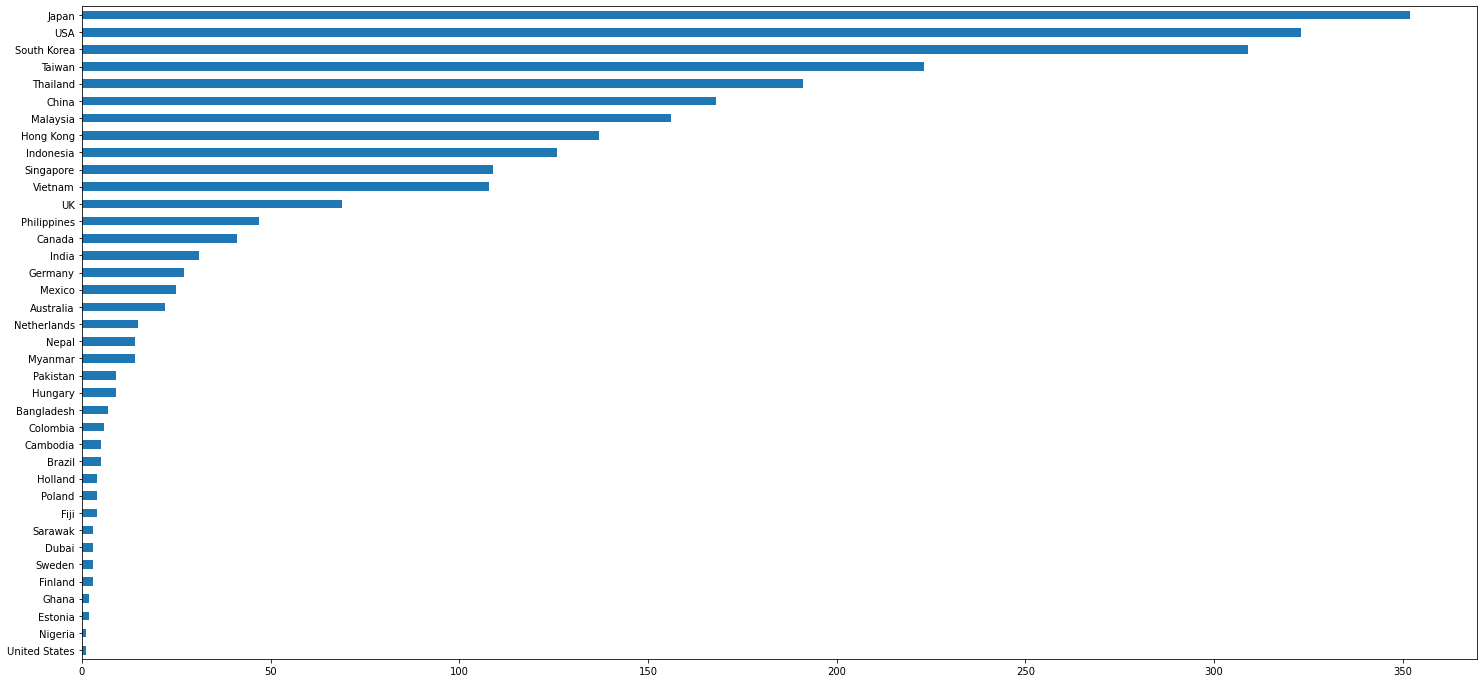

In [29]:
v = df.Country.value_counts()
v=v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(25,12))
v.plot(kind='barh')
plt.show()

#### Ramen is very popular and highly preferred in Asian countries: Japan,China,South korea are top 3. Except are USA and Africa. With most migration of people from Asian countries to those country most likely resulted in high Ramen Consumption.

####  Number of variety in each brand?

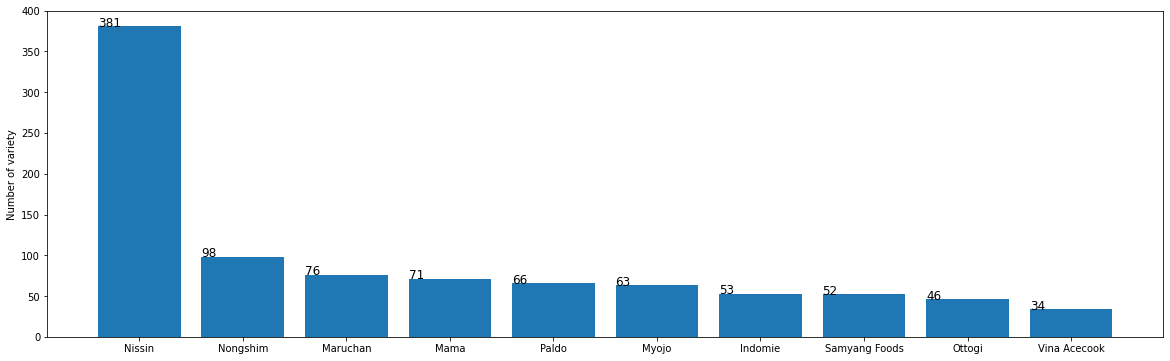

In [30]:
brands_name = df.Brand.value_counts()[:10].index
brand_size = df.Brand.value_counts()[:10].values

fig,ax=plt.subplots(figsize=(20,6))
ax.bar(brands_name, brand_size, data=df)
ax.set_ylabel('Number of variety')
for p in ax.patches:
    an=ax.annotate(str(p.get_height()), xy=(p.get_x(),p.get_height()))
    an.set_size(12)

#### "Nissin" brand to be having the highest number of products followed by "Nongshim" and "Maruchan" . 

In [31]:
## Unique variety in each top 10 brand
df.groupby(['Brand']).Variety.nunique().sort_values(ascending=False).head(10)

Brand
Nissin           369
Nongshim          94
Maruchan          75
Mama              70
Myojo             62
Paldo             61
Indomie           52
Samyang Foods     51
Ottogi            42
Vina Acecook      34
Name: Variety, dtype: int64

####  Most prefered Ramen style, in across different countries

In [32]:
style=df.Style.value_counts()
style

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

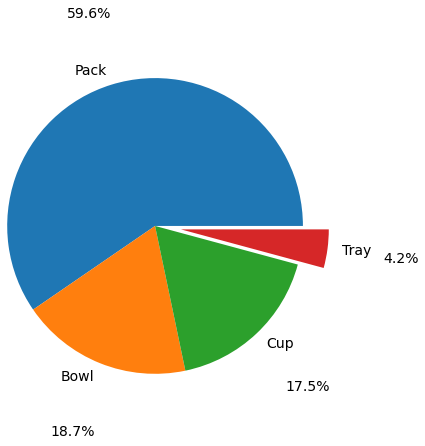

In [33]:
plt.pie(style[0:4],pctdistance=1.5,autopct="%2.01f%%",radius=1.7,labels=['Pack','Bowl','Cup','Tray'],
        explode=[0,0,0,0.3],
       textprops={'fontsize': 14})
plt.show()

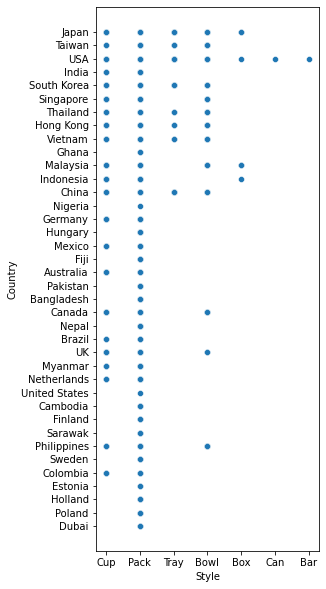

In [34]:
a4_dims = (4, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df,y='Country',x='Style')
plt.show()

#### "Pack" Style is most preferred with 59.6% and followed by "Bowl" and "Cup"(~18% each)

####  What is the density distribution for the "Stars" of Ramen?

C:\Users\yi.lu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


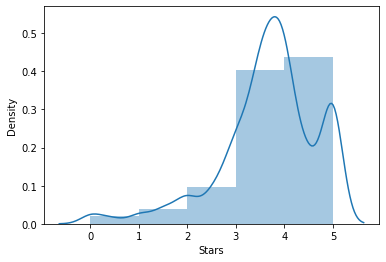

In [35]:
sns.distplot(df['Stars'],hist=True,kde=True,bins=5)
plt.show()

#### The plot of density of "Stars" shows that it is "Left Skewed". Mean < Median. Most of the Brand between 3 Star to 5 star.

####  Which Country has the highest average Stars?

In [36]:
mean_star = round(df['Stars'].mean(),2)
mean_star

3.65

In [37]:
avg_stars = df.groupby('Country').mean().sort_values(by=['Stars'], ascending=False)
avg_stars

,Review #,Stars,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank
Country,,,,,,,
Brazil,2093.600000,4.350000,0.000000,0.000000,0.000000,0.000000,0.000000
Sarawak,1707.333333,4.333333,0.000000,0.000000,0.000000,0.000000,0.000000
Cambodia,1822.400000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000
Malaysia,1623.602564,4.151218,0.000000,0.000000,0.051282,0.115385,0.000000
Singapore,1702.917431,4.126147,0.091743,0.027523,0.073394,0.000000,0.128440
Indonesia,991.484127,4.067460,0.063492,0.023810,0.000000,0.000000,0.000000
Japan,1375.928977,3.981605,0.036932,0.017045,0.011364,0.025568,0.000000
Myanmar,1879.000000,3.946429,0.000000,0.000000,0.000000,0.000000,0.714286
Fiji,1644.500000,3.875000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Brazil has the highest average stars. And Brazil has never been nominated to be in the Top Ten list.

#### Top 3 most preferred brands in Japan, USA, China. And their star analysis within those brands

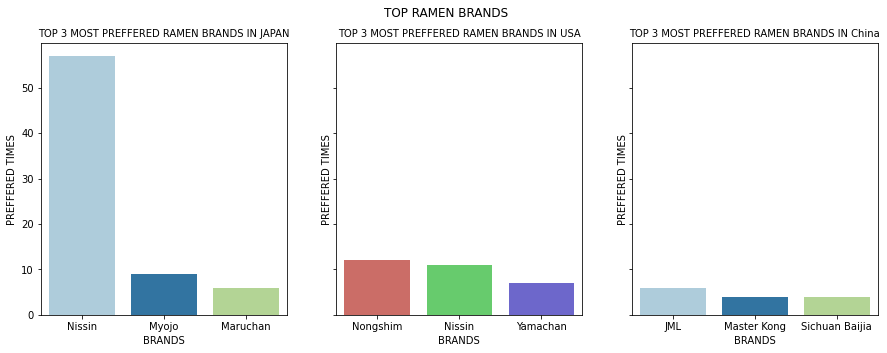

In [38]:
japan=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4.5)]
usa=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4.5)]
China=df.loc[(df['Country'] == 'China') & (df['Stars'] >= 4.5)]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# TITLE
fig.suptitle('TOP RAMEN BRANDS')
axes[0].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN JAPAN',fontsize=10)
axes[1].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN USA',fontsize=10)
axes[2].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN China',fontsize=10)
axes[0].set_ylabel('PREFFERED TIMES', fontsize=10)
axes[0].set_xlabel('BRANDS', fontsize=10)
axes[1].set_ylabel('PREFFERED TIMES', fontsize=10)
axes[1].set_xlabel('BRANDS', fontsize=10)
axes[2].set_ylabel('PREFFERED TIMES', fontsize=10)
axes[2].set_xlabel('BRANDS', fontsize=10)

# JAPAN
x_jp= japan['Brand'].value_counts()
x_jp= x_jp[:3,]
sns.barplot(ax=axes[0],x=x_jp.index, y=x_jp.values,palette="Paired")

# USA
x_usa= usa['Brand'].value_counts()
x_usa= x_usa[:3,]
sns.barplot(ax=axes[1],x=x_usa.index,y= x_usa.values,palette="hls")

# China
x_sk= China['Brand'].value_counts()
x_sk= x_sk[:3,]
sns.barplot(ax=axes[2],x=x_sk.index,y= x_sk.values,palette="Paired")
plt.show()

### Star Rating Analysis in Japan

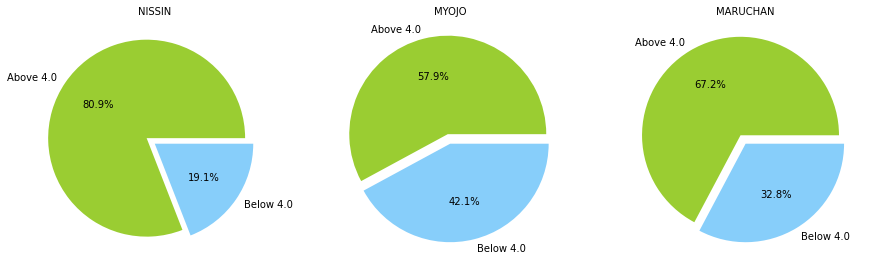

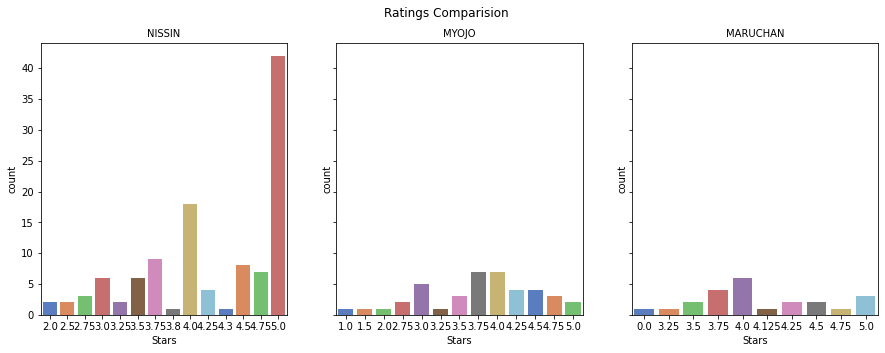

In [39]:
# NISSIN
jn1=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4)& (df['Brand']=='Nissin')]
jn2=df.loc[(df['Country'] == 'Japan') & (df['Stars'] < 4)& (df['Brand']=='Nissin')]
totjnp=jn1['Review #'].sum()
totjnn=jn2['Review #'].sum()
rev1 = totjnp,totjnn

# MYOJO
jmy1=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4)& (df['Brand']=='Myojo')]
jmy2=df.loc[(df['Country'] == 'Japan') & (df['Stars'] < 4)& (df['Brand']=='Myojo')]
totmyp=jmy1['Review #'].sum()
totmyn=jmy2['Review #'].sum()
rev2 = totmyp,totmyn

# MARUCHAN
jma1=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4)& (df['Brand']=='Maruchan')]
jma2=df.loc[(df['Country'] == 'Japan') & (df['Stars'] < 4)& (df['Brand']=='Maruchan')]
totmap=jma1['Review #'].sum()
totman=jma2['Review #'].sum()
rev3 = totmap,totman
labels = 'Above 4.0','Below 4.0'
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(rev1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(rev2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(rev3, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[0].set_title('NISSIN',fontsize=10)
ax[1].set_title('MYOJO',fontsize=10)
ax[2].set_title('MARUCHAN',fontsize=10)
plt.show()
japan_b1=df.loc[(df['Country'] == 'Japan') & (df['Brand']=='Nissin')]
japan_b2=df.loc[(df['Country'] == 'Japan') & (df['Brand']=='Myojo')]
japan_b3=df.loc[(df['Country'] == 'Japan') & (df['Brand']=='Maruchan')]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Ratings Comparision')
axes[0].set_title('NISSIN',fontsize=10)
axes[1].set_title('MYOJO',fontsize=10)
axes[2].set_title('MARUCHAN',fontsize=10)
sns.countplot(ax=axes[0],x="Stars", data=japan_b1, palette="muted")
sns.countplot(ax=axes[1],x="Stars", data=japan_b2, palette="muted")
sns.countplot(ax=axes[2],x="Stars", data=japan_b3, palette="muted")
plt.show()

### Star Rating Analysis in USA

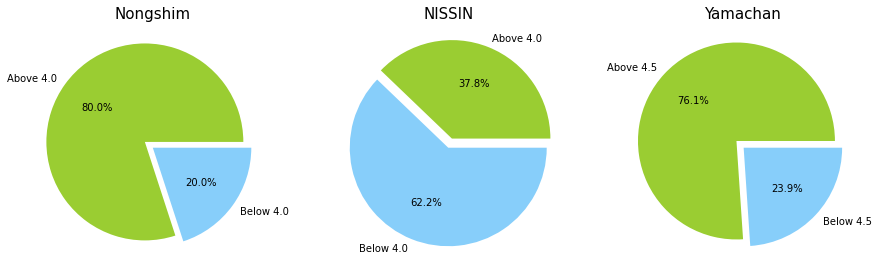

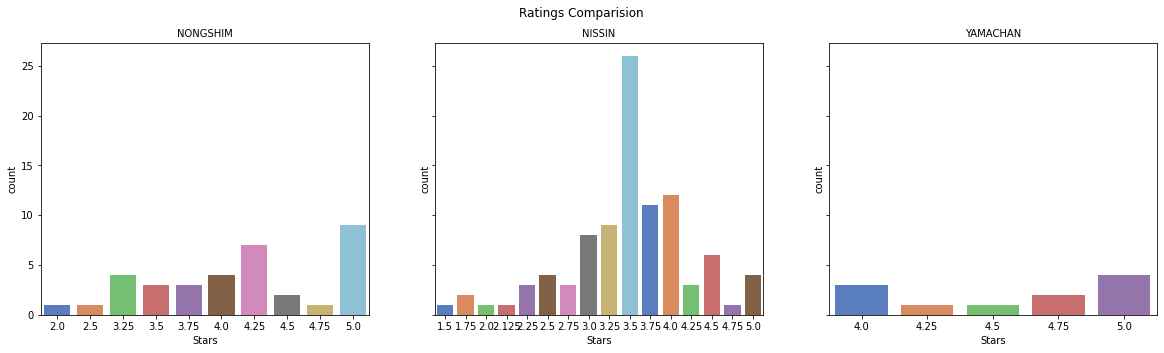

In [40]:
#Nongshim 
ub1=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4)& (df['Brand']=='Nongshim')]
usb1=df.loc[(df['Country'] == 'USA') & (df['Stars'] < 4)& (df['Brand']=='Nongshim')]
totub1=ub1['Review #'].sum()
totusb1=usb1['Review #'].sum()
us1 = totub1,totusb1

# NISSIN
ub2=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4)& (df['Brand']=='Nissin')]
usb2=df.loc[(df['Country'] == 'USA') & (df['Stars'] < 4)& (df['Brand']=='Nissin')]
totub2=ub2['Review #'].sum()
totusb2=usb2['Review #'].sum()
us2 = totub2,totusb2

#Yamachan
ub3=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4.5)& (df['Brand']=='Yamachan')]
usb3=df.loc[(df['Country'] == 'USA') & (df['Stars'] < 4.5)& (df['Brand']=='Yamachan')]
totub3=ub3['Review #'].sum()
totusb3=usb3['Review #'].sum()
us3 = totub3,totusb3
labels = 'Above 4.0','Below 4.0'
label1="Above 4.5","Below 4.5"
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(us1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(us2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(us3, explode=explode, labels=label1, colors=colors,autopct='%1.1f%%')
ax[0].set_title('Nongshim',fontsize=15)
ax[1].set_title('NISSIN',fontsize=15)
ax[2].set_title('Yamachan',fontsize=15)
plt.show()
usa_b1=df.loc[(df['Country'] == 'USA') &  (df['Brand']=='Nongshim')]
usa_b2=df.loc[(df['Country'] == 'USA') &  (df['Brand']=='Nissin')]
usa_b3=df.loc[(df['Country'] == 'USA') &  (df['Brand']=='Yamachan')]
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Ratings Comparision')
axes[0].set_title('NONGSHIM',fontsize=10)
axes[1].set_title('NISSIN',fontsize=10)
axes[2].set_title('YAMACHAN',fontsize=10)
sns.countplot(ax=axes[0],x="Stars", data=usa_b1, palette="muted")
sns.countplot(ax=axes[1],x="Stars", data=usa_b2, palette="muted")
sns.countplot(ax=axes[2],x="Stars", data=usa_b3, palette="muted")
plt.show()

### Star Rating Analysis in China

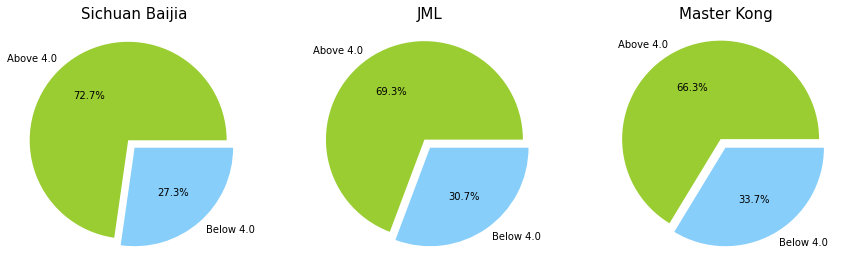

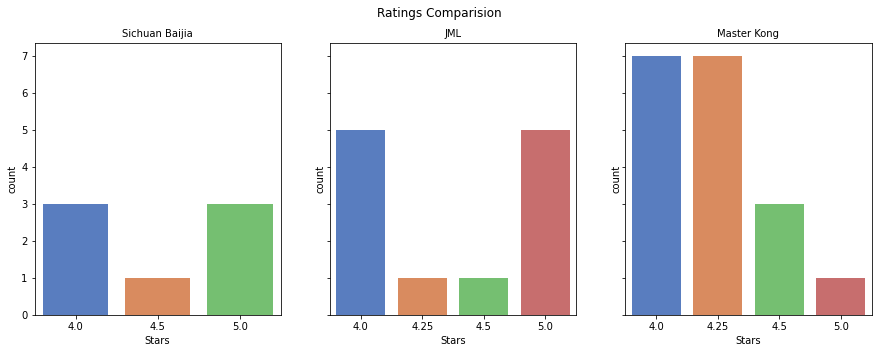

In [42]:
# Sichuan Baijia
sk1=df.loc[(df['Country'] == 'China') & (df['Stars'] >= 4)& (df['Brand']=='Sichuan Baijia')]
skb1=df.loc[(df['Country'] == 'China') & (df['Stars'] < 4)& (df['Brand']=='Sichuan Baijia')]
totsk1=sk1['Review #'].sum()
totskb1=skb1['Review #'].sum()
rev1 = totsk1,totskb1

# JML
sk2=df.loc[(df['Country'] == 'China') & (df['Stars'] >= 4)& (df['Brand']=='JML')]
skb2=df.loc[(df['Country'] == 'China') & (df['Stars'] < 4)& (df['Brand']=='JML')]
totsk2=sk2['Review #'].sum()
totskb2=skb2['Review #'].sum()
rev2 = totsk2,totskb2

# Master Kong
sk3=df.loc[(df['Country'] == 'China') & (df['Stars'] >= 4)& (df['Brand']=='Master Kong')]
skb3=df.loc[(df['Country'] == 'China') & (df['Stars'] < 4)& (df['Brand']=='Master Kong')]
totsk3=sk3['Review #'].sum()
totskb3=skb3['Review #'].sum()
rev3 = totsk3,totskb3
labels = 'Above 4.0','Below 4.0'
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(rev1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(rev2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(rev3, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[0].set_title('Sichuan Baijia',fontsize=15)
ax[1].set_title('JML',fontsize=15)
ax[2].set_title('Master Kong',fontsize=15)
plt.show()
south_k_b1=df.loc[(df['Country'] == 'China') & (df['Stars'] >= 4)& (df['Brand']=='Sichuan Baijia')]
south_k_b2=df.loc[(df['Country'] == 'China') & (df['Stars'] >= 4)& (df['Brand']=='JML')]
south_k_b3=df.loc[(df['Country'] == 'China') & (df['Stars'] >= 4)& (df['Brand']=='Master Kong')]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Ratings Comparision')
axes[0].set_title('Sichuan Baijia',fontsize=10)
axes[1].set_title('JML',fontsize=10)
axes[2].set_title('Master Kong',fontsize=10)
sns.countplot(ax=axes[0],x="Stars", data=south_k_b1, palette="muted")
sns.countplot(ax=axes[1],x="Stars", data=south_k_b2, palette="muted")
sns.countplot(ax=axes[2],x="Stars", data=south_k_b3, palette="muted")
plt.show()

# Summary & Key takeaways
#### Japan,China,South korea are top 3 Ramen Consumption Countries
#### "Nissin" brand to be having the highest number of products followed by "Nongshim" and "Maruchan" . 
#### "Pack" Style is most preferred with 59.6% and followed by "Bowl" and "Cup"(~18% each)
#### The plot of density of "Stars" shows that it is "Left Skewed". Mean < Median. Most of the Brand between 3 Star to 5 star. Mean star is around 3.65
#### Brazil has the highest average stars. And Brazil has never been nominated to be in the Top Ten list.
#### Top 3 most preferred brands in Japan & USA
#### Japan: 1.NISSIN,  2. MYOJO, 3.MARUCHAN
#### USA:   1.Nongshim, 2. NISSIN, 3.Yamachan
#### China:   1.JML, 2. Master Kong, 3.Sichuan